Digite a data de início (no formato AAAA-MM-DD): 2017-08-13
Digite a data de término (no formato AAAA-MM-DD): 2023-09-19
        Data  Vendas       Clima Pragas  Taxa_Inflacao Taxacao Evento_Global
0 2017-08-13    2344  Ensolarado    Não       0.033016   Média           Não
1 2017-09-12    1878  Ensolarado    Sim       0.093951   Baixa           Não
2 2017-10-12    4514  Ensolarado    Sim       0.064431   Baixa           Sim
3 2017-11-11    3770     Nublado    Sim       0.063529   Baixa           Não
4 2017-12-11    1204  Ensolarado    Não       0.057362   Baixa           Não


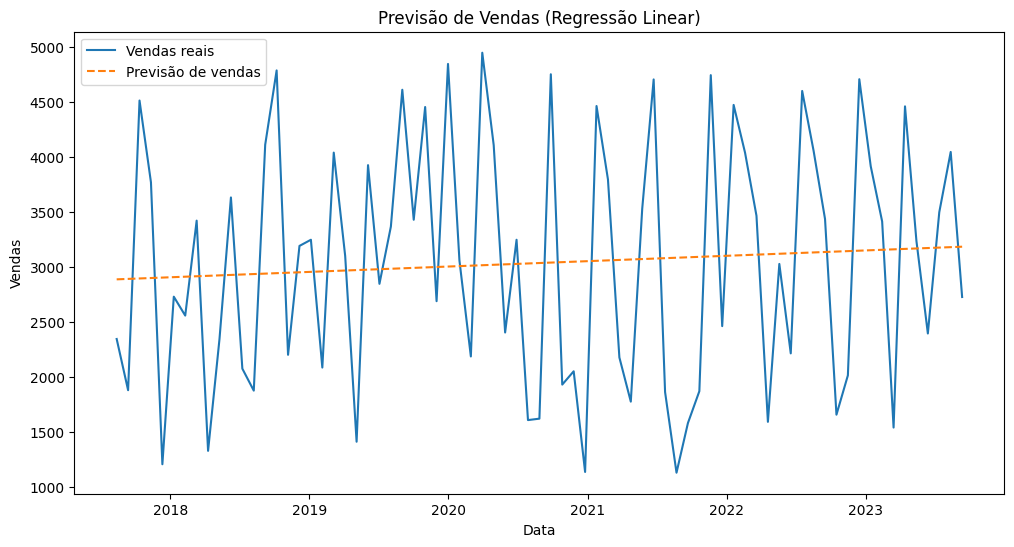

In [18]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Solicitar ao usuário as datas de início e término para os dados de vendas
start_date_str = input("Digite a data de início (no formato AAAA-MM-DD): ")
end_date_str = input("Digite a data de término (no formato AAAA-MM-DD): ")

# Converter as datas de entrada para objetos datetime
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Criar um DataFrame de vendas fictícias de 2000 a 2020
date_range = [start_date + timedelta(days=i*30) for i in range(int((end_date - start_date).days / 30) + 1)]

# Gerar dados de vendas fictícias
vendas = [random.randint(1000, 5000) for _ in range(len(date_range))]

data = {
    'Data': date_range,
    'Vendas': vendas,
}

df_vendas = pd.DataFrame(data)

# Adicionar informações regionais (por exemplo, dados de clima e pragas)
clima_choices = ['Chuvoso', 'Ensolarado', 'Nublado']
pragas_choices = ['Sim', 'Não']

df_vendas['Clima'] = [random.choice(clima_choices) for _ in range(len(date_range))]
df_vendas['Pragas'] = [random.choice(pragas_choices) for _ in range(len(date_range))]

# Adicionar informações nacionais (por exemplo, taxa de inflação e taxação)
df_vendas['Taxa_Inflacao'] = [random.uniform(0.02, 0.1) for _ in range(len(date_range))]
df_vendas['Taxacao'] = [random.choice(['Alta', 'Média', 'Baixa']) for _ in range(len(date_range))]

# Adicionar informações globais (por exemplo, eventos globais)
df_vendas['Evento_Global'] = [random.choice(['Sim', 'Não']) for _ in range(len(date_range))]

# Salvar o DataFrame em um arquivo CSV
df_vendas.to_csv('dados_vendas_john_deere.csv', index=False)

# Exibir os primeiros registros do DataFrame
print(df_vendas.head())

# Preparar dados para previsão
df_vendas['Data'] = pd.to_datetime(df_vendas['Data'])
df_vendas.set_index('Data', inplace=True)
df_vendas.sort_index(inplace=True)

# Realizar uma regressão linear simples
X = np.arange(len(df_vendas)).reshape(-1, 1)
y = df_vendas['Vendas'].values

reg = LinearRegression().fit(X, y)
forecast = reg.predict(X)

# Plotar os dados reais e a previsão
plt.figure(figsize=(12, 6))
plt.plot(df_vendas.index, df_vendas['Vendas'], label='Vendas reais')
plt.plot(df_vendas.index, forecast, label='Previsão de vendas', linestyle='--')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Previsão de Vendas (Regressão Linear)')
plt.show()
